# <center>PROJECT WORK</center>

# Objective
- Analysis on what sort of people likely survived. 
- Also, applying tools of machine learning to predict which passengers would survived Titanic sinking.

## _0. Fetching the data_
Dataset is taken from [kaggle's](https://www.kaggle.com/c/titanic/data) prediction competitions, the Titanic challenge. And merged into a single file titanic.csv <br>
The cell below is to load the packages required to run this notebook.

In [1]:
# modules to handle data
import pandas as pd
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

<br>

## _I. Data Cleaning_

The main aim of Data Cleaning is to identify and remove errors & duplicate data, in order to create a reliable dataset. This improves the quality of the training data for analytics and enables accurate decision-making.<br>
Setting up a quality plan, filling missing values, removing rows, reducing data size are some of the best practices used for data cleaning in Machine Learning.


**Before doing anything else it is important to remove `NaN` values or fill `NaN` values with mean, median, etc.**

### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [2]:
# loading data
titanic = pd.read_csv('titanic.csv')

# Viewing first 5 rows
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# getting info on dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


The `info()` function reveals that the `Age`, `Fare`, `Cabin` and `Embarked` all have some entries missing.
- Age: 263 out of 1309 values missing ( 20% values missing)
- Fare: 1 out of 1309 values missing ( 0.07% values missing)
- Cabin: 1014 out of 1309 values missing ( 77.46% values missing)
- Embarked: 2 out of 1309 values missing ( 0.15% values missing)

There are a few missing entries in variable `Fare` and `Embarked` which can be inferred by other values. There are more than 77% of missing entries in `Cabin`, which is not very helpful. So, let's drop it. Also, 20% passenger ages were not recorded. But it shouldn't be dropped as `Age` is likely to be one of the key variable because "Women and children first" was code of conduct back then.

Additionally, `PassengerId` can be dropped as it is simply a row identifier. And `Ticket` variable is also dropped although it could be possible that it is holding useful information, but extensive work would be required. So, we dropped it for simplicity. 

In [4]:
# PassengerId, Ticket and Cabin are dropped
titanic.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

Now we will fill missing values for `Embarked`, by simply filling `NaN` values with most common port of embarkation.

In [5]:
# finding most frequent Embarked port
most_embarked = titanic.Embarked.value_counts().index[0]
print('Most embarked port is', most_embarked)

# filling NaN with most_embarked value
titanic.Embarked = titanic.Embarked.fillna(most_embarked)

Most embarked port is S


Here 'S' stands for Southampton <br>
Next, we have just one missing value for `Fare`. We'll just fill it with `median` value.

In [6]:
# filling NaN with median fare
titanic.Fare = titanic.Fare.fillna(titanic.Fare.median())

From the `Name` column we could extract title of the person. This will allow us to estimate feature `Age` more accurately.

In [7]:
# Creating a new feature Title from the Name column
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Viewing the newly created feature
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [8]:
# show count of titles
print("There are ", len(titanic.Title.unique()), "unique titles.")

# show unique titles
print("\n", titanic.Title.unique())

print(titanic.Title.value_counts())

There are  18 unique titles.

 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']
Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Jonkheer          1
the Countess      1
Lady              1
Don               1
Dona              1
Mme               1
Capt              1
Sir               1
Name: Title, dtype: int64


There are various titles but we can bin them in 5 different categories.
- Mr
- Master 
- Mrs
- Miss
- Rare 

Note: Master is a title given to an underage male. Mlle and Mme is French version of "Miss" and "Mrs" respectively.

In [9]:
# Binning
titles_dict = {
    "Capt":       "Rare",
    "Col":        "Rare",
    "Major":      "Rare",
    "Jonkheer":   "Rare",
    "Don":        "Rare",
    "Sir" :       "Rare",
    "Dr":         "Rare",
    "Rev":        "Rare",
    "the Countess":"Rare",
    "Dona":       "Rare",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Rare"
}

# mapping the binned titles to the current titles
titanic.Title = titanic.Title.map(titles_dict)

# view value counts for the normalized titles
print(titanic.Title.value_counts())

Mr        757
Miss      262
Mrs       200
Master     61
Rare       29
Name: Title, dtype: int64


Now we are going to assume that their is a relation between a person's age and title since younger person is more likely to have a title of "Miss" or "Master" rather than "Mrs" or "Mr"

We will now group data by `Sex` and `Title` then view median age for the group.

In [10]:
# Group by Sex and Title
grouped = titanic.groupby(['Sex', 'Title'])

# Viewing median age by the grouped features
grouped.Age.median()

Sex     Title 
female  Miss      22.0
        Mrs       35.0
        Rare      43.5
male    Master     4.0
        Mr        29.0
        Rare      48.0
Name: Age, dtype: float64

Clearly, passengers with title "Miss" and "Master" are younger than "Mrs" and "Mr" respectively. So this should help us to estimate missing ages more accurately. 

In [11]:
# applying the grouped median value on missing Age values 
titanic.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

# viewing changes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB


**Yay!** We have finally cleaned the dataset. And there is **no missing values** as we see from `titanic.info()`

<br>

## _II. Descriptive Data Analysis_
Descriptive statistics is the term given to the analysis of data that helps describe, show or summarize data in a meaningful way such that, for example, patterns might emerge from the data. Descriptive statistics do not, however, allow us to make conclusions beyond the data we have analysed or reach conclusions regarding any hypotheses we might have made. They are simply a way to describe our data.

Descriptive statistics are very important because if we simply presented our raw data it would be hard to visulize what the data was showing, especially if there was a lot of it. Descriptive statistics therefore enables us to present the data in a more meaningful way, which allows simpler interpretation of the data.


**Now we have a fully clean dataset. Time to apply some descriptive analysis on the given dataset.<br>
Importing python library for visualization**

In [12]:
# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# environment setup
sns.set() # setting seaborn default for plots
#plt.style.use('ggplot')
%matplotlib inline

In [13]:
def bar_chart(feature, color):
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', figsize=(10,5), color=color)

Sex     Survived
female  1           339
        0           127
male    0           682
        1           161
Name: Survived, dtype: int64

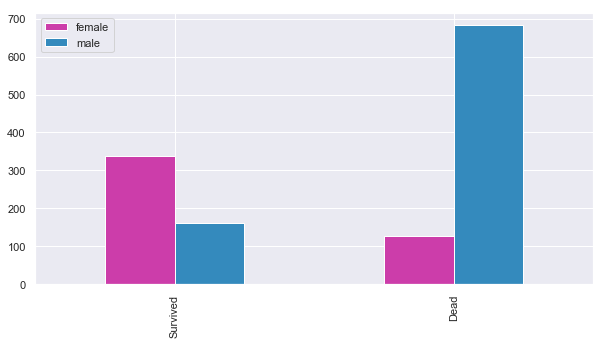

In [14]:
bar_chart('Sex', ['#cc3daa', '#348ABD'])

titanic.groupby('Sex').Survived.value_counts()

Out of 466 females 339 survived (**72%**). Whereas, out of 843 males 161 survived (**19%**). <br>
This shows **Women** more likely survived than **Men** 

Pclass  Survived
1       1           200
        0           123
2       0           158
        1           119
3       0           528
        1           181
Name: Survived, dtype: int64

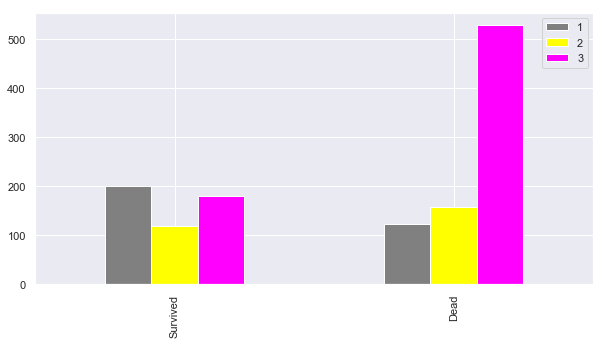

In [15]:
bar_chart('Pclass',['gray','yellow','magenta'])

titanic.groupby('Pclass').Survived.value_counts()

This shows **1st class** more likely survived than **other classes**  
Also, **3rd class** more likely dead than **other classes**

Embarked  Survived
C         1           150
          0           120
Q         0            79
          1            44
S         0           610
          1           306
Name: Survived, dtype: int64

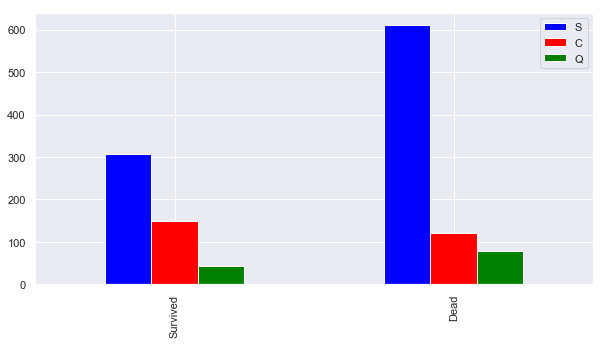

In [16]:
bar_chart('Embarked',['blue','red','green'])

titanic.groupby('Embarked').Survived.value_counts()

### S = **Southampton**, C = **Cherbourg**, Q = **Queenstown** <br>
Looking at absolute counts it seems that most people from Southampton survived but number of people embarked from Southampton is also high.

Let's look at the ratio of population survived by `Embarked`
- Out of 916 people boarded from Southampton 306 survived (**33.4%**)
- Out of 270 people boarded from Cherbourg 150 survived (**55.55%**)
- Out of 123 people boarded from Queenstown 44 survived (**35.77%**)

Thus, a person boarded from Cherbourg is slightly more likely to survive.

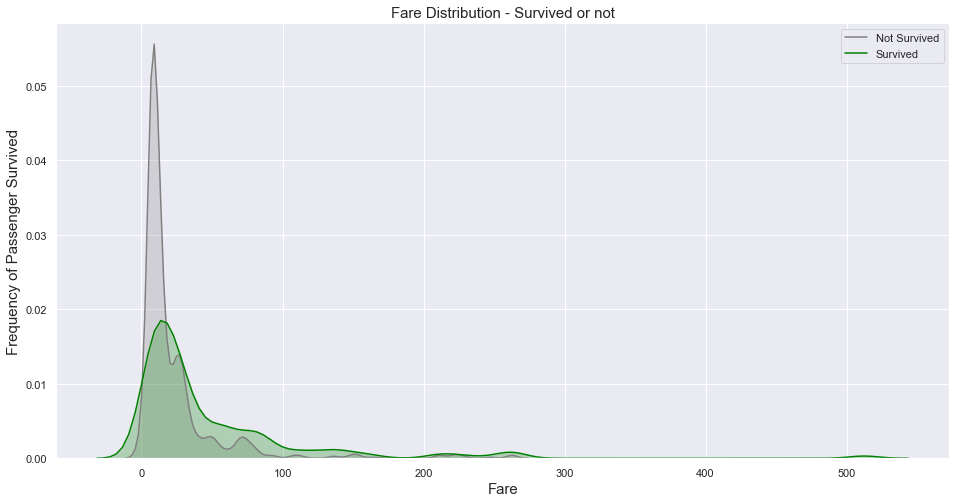

In [17]:
fig = plt.figure(figsize=(16,8))

ax = sns.kdeplot(titanic[titanic['Survived'] == 0]['Fare'] , 
                 color = 'gray',
                 shade = True,
                 label='Not Survived')

ax = sns.kdeplot(titanic[titanic['Survived'] == 1]['Fare'] , 
                 color = 'green',
                 shade = True,
                 label='Survived')

ax.set_title('Fare Distribution - Survived or not', fontsize=15)
ax.set_xlabel('Fare', fontsize = 15)
ax.set_ylabel('Frequency of Passenger Survived', fontsize =15)
plt.show()

Passengers with cheaper ticket fares are more likely to die. Or in other words people with expensive tickets may have more important social status, seem to be rescued first. 

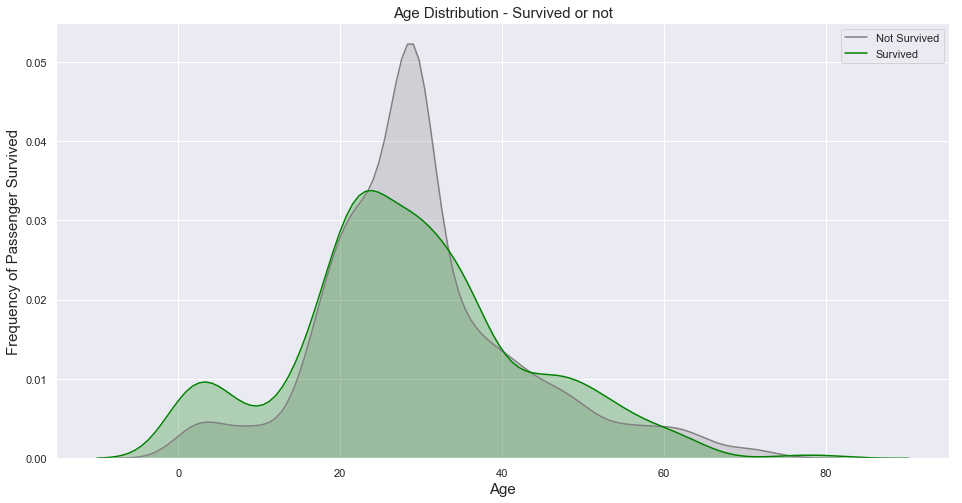

In [18]:
fig = plt.figure(figsize=(16,8))

ax = sns.kdeplot(titanic[titanic['Survived'] == 0]['Age'] , 
                 color = 'gray',
                 shade = True,
                 label='Not Survived')

ax = sns.kdeplot(titanic[titanic['Survived'] == 1]['Age'] , 
                 color = 'green',
                 shade = True,
                 label='Survived')

ax.set_title('Age Distribution - Survived or not', fontsize=15)
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Frequency of Passenger Survived', fontsize =15)
plt.show()

Younger people had a higher chance of survival.

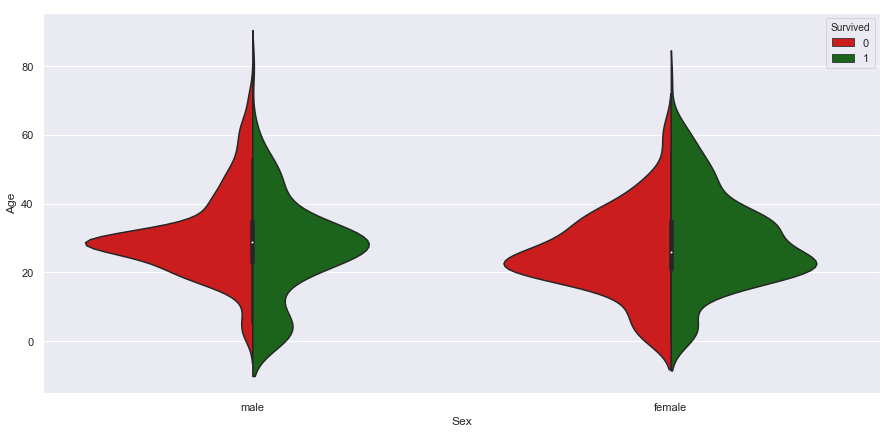

In [19]:
fig = plt.figure(figsize=(15, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=titanic, 
               split=True,
               palette={0: "#e80000", 1: "#107010"}
              );

We can infer few things from the above violin plot
- More women survived than men, as depicted by larger green female histogram
- Younger male tends to survive
- A large population between age 20-40 died.

This violin plot confirms old code of conduct Captains and Sailors used to follow in life threatening situations: **Women and Children are First!**

<br>

## _III. Modeling_
One last step before modeling, we need to convert all categorical features to numbers, as our algorithms can only take an array of numbers, no letters or names. We can use `pd.get_dummies()` function from `Pandas` to convert categorical features into dummy variables. 

In [20]:
# Converting the male and female groups to integer form
titanic.Sex = titanic.Sex.map({"female": 0, "male":1})

# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(titanic.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(titanic.Title, prefix="Title")
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix="Embarked")

In next step, we concatenate all the dummy variable columns together and drop all the remaining categorical columns and other columns we don't need.

In [21]:
# concatenating dummy columns with main dataset
titanic_dummies = pd.concat([titanic, pclass_dummies, title_dummies, embarked_dummies], axis=1)

# dropping useless fields
titanic_dummies.drop(['Pclass', 'Title', 'Embarked', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)

titanic_dummies.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,7.2500,0,0,1,0,0,1,0,0,0,0,1
1,1,0,38.0,71.2833,1,0,0,0,0,0,1,0,1,0,0
2,1,0,26.0,7.9250,0,0,1,0,1,0,0,0,0,0,1
3,1,0,35.0,53.1000,1,0,0,0,0,0,1,0,0,0,1
4,0,1,35.0,8.0500,0,0,1,0,0,1,0,0,0,0,1


Finally, we will separate the combined dataset into `train` and `test` dataset (Split ratio `80:20`).

In [22]:
titanic_dummies.shape

(1309, 15)

In [23]:
train = titanic_dummies[:1047]
test = titanic_dummies[1047:]

In [24]:
# creating x and y for independent and dependent variables respectively
x_train = train.drop('Survived', axis=1).values
y_train = train.Survived.values

x_test = test.drop('Survived', axis=1).values
y_test = test.Survived.values

 <br>

### Decision Tree Model

In Decision Trees the data is continuously split according to a certain parameter covering both classification and regression. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split.

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# training
dtc.fit(x_train, y_train)

# accuracy
print('Decision Tree: Accuracy=',round(dtc.score(x_test, y_test),4)*100, '%')

Decision Tree: Accuracy= 77.10000000000001 %


### Naive Bayes Model

In machine learning we are often interested in selecting the best hypothesis (h) given data (d).

One of the easiest ways of selecting the most probable hypothesis given the data that we have that we can use as our prior knowledge about the problem. Bayes’ Theorem provides a way that we can calculate the probability of a hypothesis given our prior knowledge.

Bayes’ Theorem is stated as:

P(h|d) = (P(d|h) * P(h)) / P(d)

Where

P(h|d) is the probability of hypothesis h given the data d. This is called the posterior probability.<br>
P(d|h) is the probability of data d given that the hypothesis h was true.<br>
P(h) is the probability of hypothesis h being true (regardless of the data). This is called the prior probability of h.<br>
P(d) is the probability of the data (regardless of the hypothesis).

In [26]:
from sklearn.naive_bayes import BernoulliNB
NB_mod = BernoulliNB()

# training
NB_mod.fit(x_train, y_train)

# accuracy
print('Naive Bayes: Accuracy=',round(NB_mod.score(x_test, y_test),4)*100, '%')

#accuracy above 70% shows that the model can be acceptable but accuracy of no model can be 100%.

Naive Bayes: Accuracy= 78.24 %


### Logistic Regression Model
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary.
Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more independent variables.


In [27]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()

# training 
logreg_model.fit(x_train, y_train)

# accuracy
print('Logistic Regression: Accuracy=',round(logreg_model.score(x_test, y_test),4)*100, '%')

#accuracy above 70% is considered good

Logistic Regression: Accuracy= 79.39 %


In [28]:


from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
test_pred = logreg_model.predict(x_test)
#print('Logreg: Accuracy= {:.4f}'.format(accuracy_score(test_pred, y_test)))
print(confusion_matrix(test_pred, y_test))
print(test.Survived.value_counts())

[[135  27]
 [ 27  73]]
0    162
1    100
Name: Survived, dtype: int64
